# Clasificación del dataset Iris usando una red neuronal

## Introducción
En este ejemplo, vamos a utilizar el dataset de *Iris* para entrenar una red neuronal simple con PyTorch. El dataset de *Iris* es un clásico de problemas de clasificación que consiste en predecir a qué especie pertenece una flor utilizando cuatro características: largo y ancho del sépalo y del pétalo. Hay tres posibles clases de flores: Setosa, Versicolor y Virginica. Este ejemplo es una buena introducción a los conceptos de clasificación con redes neuronales.

https://en.wikipedia.org/wiki/Iris_flower_data_set

## Paso 1: Cargar el dataset
Comenzamos cargando el dataset de Iris desde `scikit-learn` y dividiéndolo en conjunto de entrenamiento y prueba. Además, normalizamos las características para facilitar el entrenamiento del modelo.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import sleep

# Cargar el dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
X = iris.data  # Características: largo y ancho de sépalo y pétalo
y = iris.target  # Etiquetas: clases de flores


## Distribución de las características
Vamos a visualizar la distribución de las características del dataset usando histogramas y gráficos de caja para identificar posibles patrones y outliers.

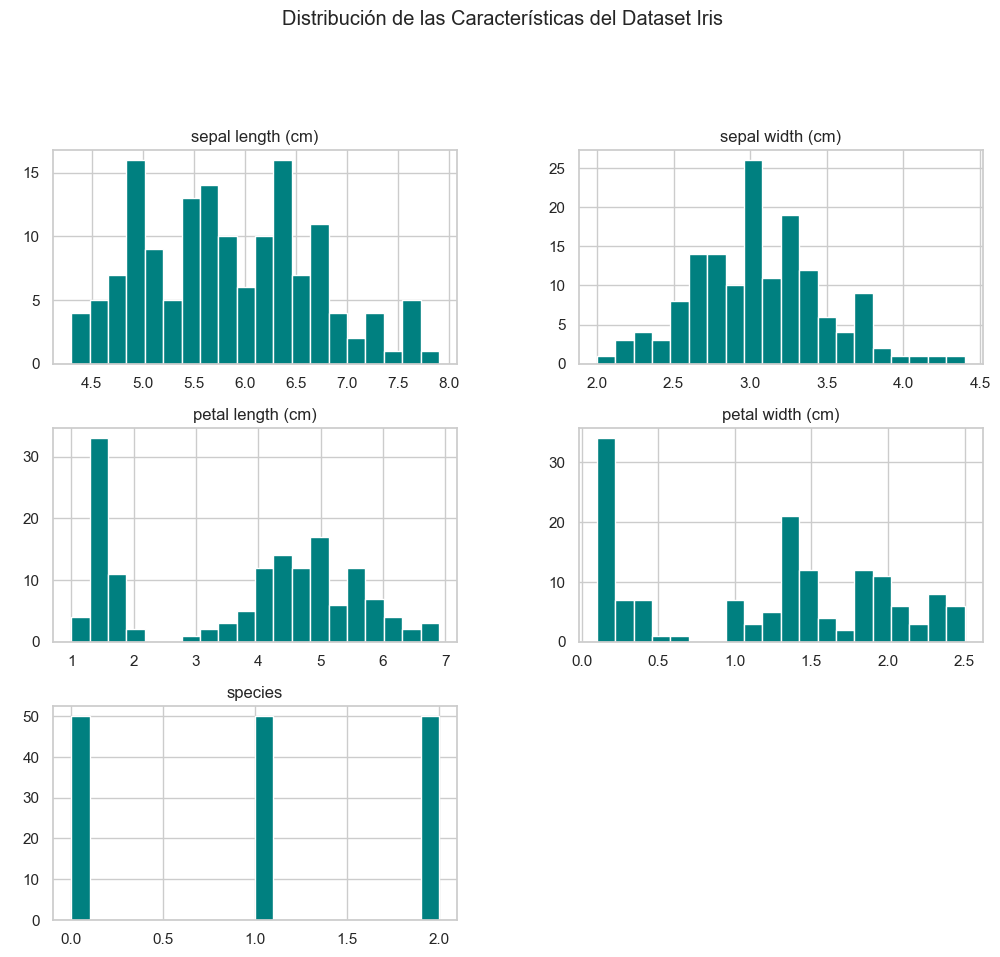

In [2]:
# Histogramas de las características
sns.set(style="whitegrid")
df.hist(bins=20, figsize=(12, 10), color='teal')
plt.suptitle('Distribución de las Características del Dataset Iris', y=1.02)
plt.show()

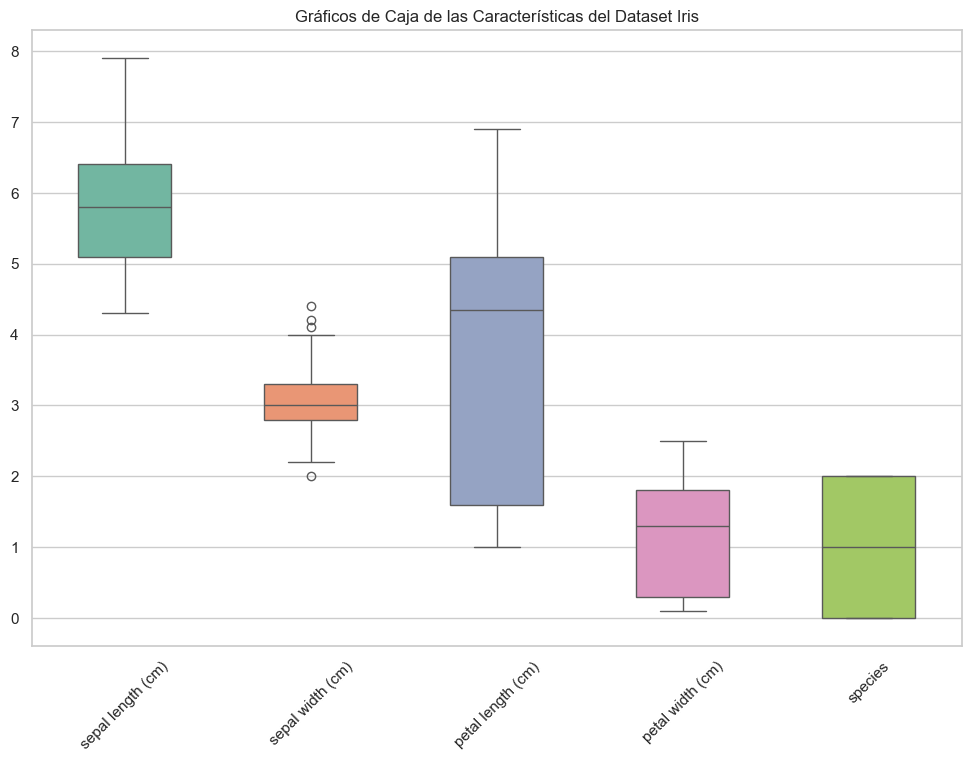

In [3]:
# Gráficos de caja para identificar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, width=0.5, palette='Set2')
plt.title('Gráficos de Caja de las Características del Dataset Iris')
plt.xticks(rotation=45)
plt.show()

## Cantidad de datos por clase
A continuación, resumimos la cantidad de muestras en cada una de las tres clases de flores para asegurarnos de que los datos están balanceados.

        Clase  Cantidad de Muestras
0      setosa                    50
1  versicolor                    50
2   virginica                    50


C:\Users\juano\AppData\Local\Temp\ipykernel_10100\3461717758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=class_counts.values, palette='viridis')


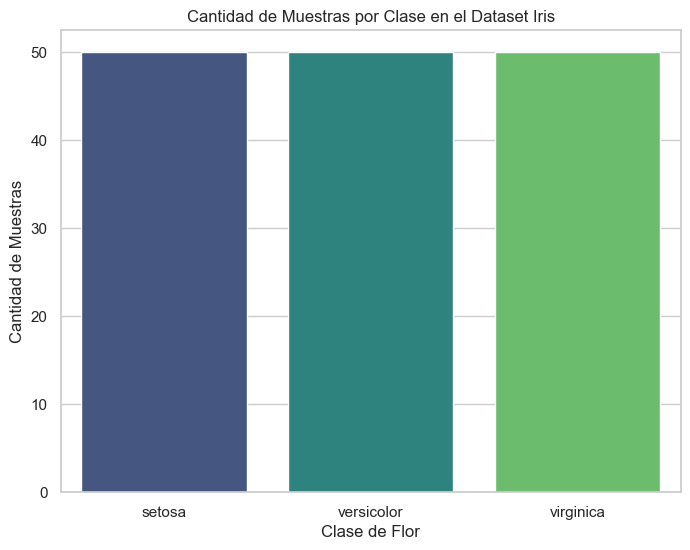

In [4]:
# Mostrar la cantidad de datos por clase
class_counts = df['species'].value_counts()
class_labels = [iris.target_names[i] for i in class_counts.index]

# Mostrar la tabla de conteos
print(pd.DataFrame({'Clase': class_labels, 'Cantidad de Muestras': class_counts.values}))

# Visualizar la cantidad de muestras por clase
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_counts.values, palette='viridis')
plt.title('Cantidad de Muestras por Clase en el Dataset Iris')
plt.ylabel('Cantidad de Muestras')
plt.xlabel('Clase de Flor')
plt.show()

In [5]:
# Escalar características y dividir en conjunto de entrenamiento y prueba
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

## Paso 2: Definir la arquitectura de la red neuronal
Ahora definimos una red neuronal simple con una capa oculta. Esta red tendrá una capa oculta con 16 neuronas y una capa de salida con 3 neuronas (una para cada clase de flor).

In [7]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Capa oculta de 16 neuronas
        self.ac1 = nn.ReLU()  # Función de activación ReLU
        self.fc2 = nn.Linear(16, 3)  # Capa de salida de 3 neuronas (una por cada clase)
        self.ac2 = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        return x

In [8]:
# Inicializar el modelo
model = SimpleNN()

In [9]:
from api_visual_dnn import draw_network
input = X_train_tensor[0]
input_list = input.tolist()
draw_network(model, input_list, 'localhost', 8000)

Layers: [{'neurons': 4}, {'neurons': 16, 'activations': ['ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU'], 'weights': [[0.409504771232605, -0.12835806608200073, -0.22624701261520386, -0.2571752667427063], [0.3708876967430115, 0.20557653903961182, -0.060070037841796875, -0.40444856882095337], [-0.45091313123703003, 0.10229337215423584, -0.13409584760665894, 0.41269731521606445], [0.4894077777862549, -0.3860529661178589, 0.2820173501968384, 0.11954212188720703], [-0.19082969427108765, 0.28233540058135986, 0.04193609952926636, -0.45526278018951416], [0.3860676884651184, -0.08747315406799316, 0.12858784198760986, 0.28281015157699585], [0.4949173331260681, -0.45934921503067017, 0.06298130750656128, 0.06955969333648682], [-0.19702839851379395, 0.3828330636024475, -0.11645722389221191, -0.2971723675727844], [0.30813515186309814, 0.22793954610824585, -0.3577994704246521, 0.39951980113983154], [0.02272111177444458, 0

{'status': 'Network updated successfully'}

## Paso 3: Definir la función de pérdida y el optimizador
Para entrenar el modelo, necesitamos definir una función de pérdida que mida el error de predicción y un optimizador que ajuste los pesos de la red para minimizar ese error. Utilizaremos la función de pérdida de entropía cruzada (`CrossEntropyLoss`) y el optimizador SGD (descenso de gradiente estocástico).

In [10]:
# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Paso 4: Entrenar el modelo
A continuación, entrenamos la red neuronal usando el conjunto de entrenamiento. Durante cada época, pasamos las características de entrada a través del modelo, calculamos la pérdida y ajustamos los pesos de la red.

In [ ]:
# Entrenar el modelo
for epoch in range(100):  # Número de épocas
    optimizer.zero_grad()  # Limpiar los gradientes
    outputs = model(X_train_tensor)  # Pasar los datos por la red
    loss = criterion(outputs, y_train_tensor)  # Calcular la pérdida
    loss.backward()  # Retropropagación
    optimizer.step()  # Actualizar los pesos

    if (epoch + 1) % 4 == 0:
        draw_network(model, input_list, 'localhost', 8000)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

print("Entrenamiento finalizado")

Layers: [{'neurons': 4}, {'neurons': 16, 'activations': ['ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU'], 'weights': [[0.4195047616958618, -0.13835805654525757, -0.21624702215194702, -0.24717527627944946], [0.3608877956867218, 0.21557648479938507, -0.07006996870040894, -0.41444849967956543], [-0.46091312170028687, 0.11229337006807327, -0.14409583806991577, 0.4026973247528076], [0.4994077682495117, -0.3760536313056946, 0.2920173406600952, 0.12954211235046387], [-0.20082968473434448, 0.2923353910446167, 0.031936101615428925, -0.465262770652771], [0.3760676980018616, -0.07747428864240646, 0.11858785152435303, 0.272810161113739], [0.504917323589325, -0.44934922456741333, 0.07298126816749573, 0.07955966889858246], [-0.1870284229516983, 0.37283310294151306, -0.10645724833011627, -0.2871723771095276], [0.31813499331474304, 0.2379392385482788, -0.3477996289730072, 0.40951964259147644], [0.032721105962991714, 0.2576

## Paso 5: Evaluar el modelo
Después de entrenar el modelo, evaluamos su rendimiento en el conjunto de prueba. Esto nos permitirá medir qué tan bien el modelo ha aprendido a clasificar las flores.

In [12]:
# Evaluar el modelo en el conjunto de prueba
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 100.00%


## Conclusión
En este cuaderno, hemos creado y entrenado una red neuronal simple para clasificar el dataset de *Iris* utilizando PyTorch. Este ejemplo muestra los pasos básicos para construir un modelo de clasificación, incluyendo la carga de datos, la definición de la arquitectura de la red, el entrenamiento y la evaluación del modelo.